In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Funções para extrair acertos
A maioria das análises TRI vão precisar de uma "dicomitização" das respostas. A estrutura de dados que vamos precisar é uma matriz com colunas itens e linhas pessoas com valores 0 e 1 para erros e acertos respectivamente.

Vamos tentar criar umas funções que crie este estrutura de dados


In [3]:
df = pd.read_csv('data/enem19-1perc2.csv')
list(df.columns)

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICA

In [35]:
df["TX_RESPOSTAS_CN"].sample(10)

21672    BBAEEDCBEDDBCDCCBEDBDEBEBDBEEBCDCDEADEDBDCEBC
29199    DDCEBADBBCDCDAEABCABABCBBBEDCBBADDDCDDEDCADEE
4808     DDECBCAEDEDAADEADCBEBBAEABBCBBABECBCBACADDBCB
22139    EEEBEEBEEDBAEDDEDEDEBDDEDECBEEDDADADDEACDDBCD
14134    ACCABBDDEACDAAAEACBABDEDCCACAAABDDEDEDDCDCEDE
17706    CDADADCEECAEACEEAABBEABECEADADDECADDCBAECBCBD
1212     ABAACACCDDBADDDDBACEECEBAADCEBBBBDAEBBAAEECBD
16562    DEAEABCCEBECEADCBBCBAADECACABEDEABBADAEECDC.D
28233    ACECACDDDDCCCDDBBBECCECEBBCBDBBDEDBDECCEBDADC
28624    BBCDDEDACDDDDBCCAEABCACEBBEDBDDECBDCBABBDADCC
Name: TX_RESPOSTAS_CN, dtype: object

In [7]:
df["TX_GABARITO_CN"].sample(10)

6935     BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
17313    BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
19101    AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC
22562    BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
20773    AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC
25055    DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE
8182     BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
15942    BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
1800     AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC
22587    AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC
Name: TX_GABARITO_CN, dtype: object

In [42]:
gab = df.loc[16562,"TX_GABARITO_CN"]
resp = df.loc[16562,"TX_RESPOSTAS_CN"]
print(resp)
print(gab)

DEAEABCCEBECEADCBBCBAADECACABEDEABBADAEECDC.D
DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC


In [51]:
[r == g for r,g in zip(resp,gab)]

[True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False]

In [89]:
def to_acertos(s):
    'resp e gab são strings, retorna uma lista'
    resp = s[0]
    gab = s[1]
    return [r == g for r,g in zip(resp,gab)]

def acertos_df(df,exame):
    'Retorna dataframe com acertos. Colunas 1-45 = itens, Linhas = idx do df'
    resp_col = 'TX_RESPOSTAS_' + exame
    gab_col = 'TX_GABARITO_' + exame
    adf = df[[resp_col,gab_col]].apply(to_acertos,axis=1,result_type = "expand")
    adf['acertos'] = adf.sum(axis=1)
    adf['nota_inep'] = df.loc[:,"NU_NOTA_" + exame]
    adf['caderno'] = df.loc[:,"CO_PROVA_" + exame]
    return adf

In [90]:
acertos_df(df,'MT')

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,acertos,nota_inep,caderno
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,4,417.7,517.0
1,True,True,False,True,True,False,False,False,False,False,...,True,False,False,False,True,False,False,8,459.9,515.0
2,True,True,False,True,True,False,False,True,True,True,...,True,False,False,False,False,True,True,19,708.5,515.0
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,7,392.1,517.0
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,True,11,425.0,517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31489,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,True,True,False,13,587.7,518.0
31490,False,True,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,True,13,551.0,518.0
31491,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,5,372.7,518.0
31492,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,True,False,False,10,450.2,517.0


In [97]:
ch = acertos_df(df,'CH')
mt = acertos_df(df,'MT')
cn = acertos_df(df,'CN')
lc = acertos_df(df,'LC')

In [102]:
lc.sort_values('acertos',ascending=True)[:20]

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,acertos,nota_inep,caderno
10398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,511.0
3141,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,512.0
1820,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,514.0
15613,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,514.0
9392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,514.0
24136,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,514.0
28535,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,514.0
860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,511.0
28232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,512.0
28936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0.0,511.0


<AxesSubplot:xlabel='acertos', ylabel='nota_inep'>

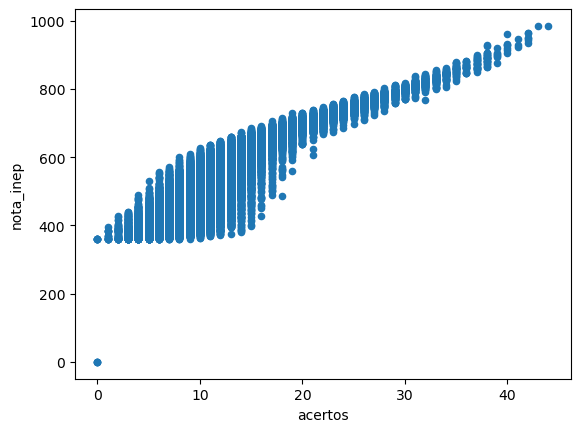

In [106]:
mt.plot(x='acertos',y='nota_inep',kind='scatter')